# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 

#### 1. What is the outcome?

Answer: Whether a user will become a customer or not (1 or 0)

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, professions, days since last login, and activity score

#### 3. What timeframe is this data relevent for?

Answer: Jan-Apr 2015

#### 4. What is the hypothesis?

Answer: Users who are have a high activity score are more likely to become paying customers 

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
GPA | a number reprsenting applicants grade point average | continuous
GRE | a number reprsenting applicants score on GRE test | continuous 
Prestige | 1 is highest, 4 is lowest| categorical 
Admit | 0 = not admitted 1 = admitted | categorical 


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: the outcome is the probablity that an applicant will be accepted

#### 3. What are the predictors/covariates? 

Answer: The predictors are the GPA, GRE score, and alumni school rank

#### 4. What timeframe is this data relevent for?

Answer: The timeframe is not identified

#### 4. What is the hypothesis?

Answer: You are more likely to be admitted if you have high a GPA, GRE, and alumni rank

    Using the above information, write a well-formed problem statement. 
Determine the probablity that an applicant will gain admission to the university based on their GPA, GRE score, and alumni school ranking from admissions.

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:

admissions=pd.read_csv('admissions.csv')

In [10]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### 1. What are the goals of the exploratory analysis? 

Answer: The main goal of exploratory analysis is to get a sense for the data types and how to the data is stored. Some of the other the goals are:
* Identify the data types
* Identify missing data and outliers
* Identify the distribution of the data
* Calculate the average, max, min, standard deviation and mode of each variable to get a general understanding of the data
* See if the variables are sigificant predictors of admittance

#### 2a. What are the assumptions of the distribution of data? 

Answer: We assume the larger the data set the more normal the distribution will become.

#### 2b. How will determine the distribution of your data? 

Answer: I would plot each variable in a density distribution. I would also look at the kurtosis to see how peaked the data is in the distribution. The higher the peak would tell me if the data is concentrated or if it is spread out. I would also look at the skew to see if the data is positively or negatively skewed.

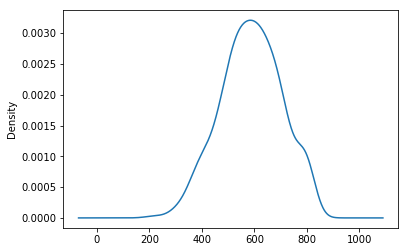

In [21]:
admissions['gre'].plot(kind="density")


In [17]:
admissions['gre'].kurtosis()

-0.33006533816662031

In [20]:
admissions['gre'].skew()

-0.15012666594587223

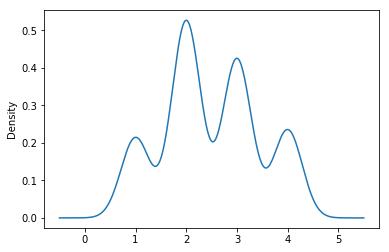

In [14]:
admissions['prestige'].plot(kind="density")

In [18]:
admissions['prestige'].kurtosis()

-0.89475861339444362

In [22]:
admissions['prestige'].skew()

0.093662653553953229

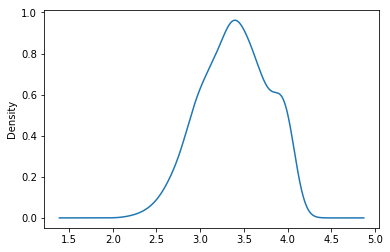

In [15]:
admissions['gpa'].plot(kind='density')

In [19]:
admissions['gpa'].kurtosis()

-0.57462254321495232

In [23]:
admissions['gpa'].skew()

-0.21176549033509626

#### 3a. How might outliers impact your analysis? 

Answer: - may skew the results to show a factor has a stronger affect on the probability of admitance than it really does.

#### 3b. How will you test for outliers? 

Answer: 
* I would use a box plot to look for outliers. The outliers are the circle points on the box plot.
* I would also plot each variable on an x,y scatter plot to see if there's any obvious outliers. From the graph below it does not appear that there any outliers in prestige. There appears to be one or two outliers on the low end for GPA and GRE. 

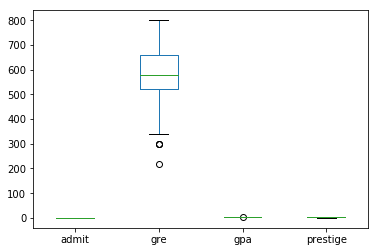

In [16]:
admissions.plot(kind="box")

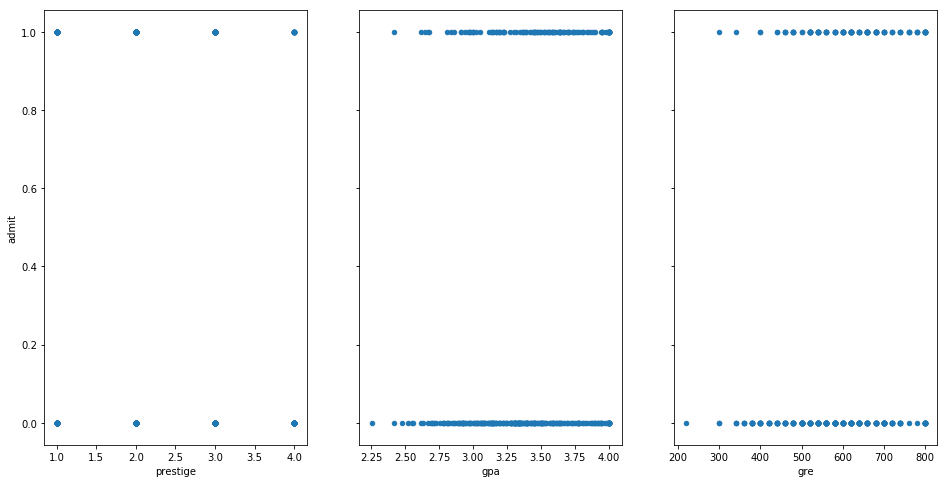

In [30]:
fig, axs = plt.subplots(1,3, sharey=True)
admissions.plot(kind='scatter', x='prestige', y='admit', ax=axs[0], figsize=(16,8))
admissions.plot(kind='scatter', x='gpa', y='admit', ax=axs[1])
admissions.plot(kind='scatter', x='gre', y='admit', ax=axs[2])

#### 4a. What is colinearity? 

Answer: colinearity is one or more predictors are correlated with each other.

#### 4b. How will you test for colinearity? 

Answer: I will use a correlation matrix. As seen below, it does not appear that any of the variables have high degree of correlation (greater than .5 or less than -.5)

In [25]:
admissions.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
* Import the 'admissions.csv' data
* Read the data dictionary to get familiarity with the data
* Identify the mean, mode, media, min, and max of each predictor
* Plot the distribution of the data using a density distribution
* Find the kurtosis and skew of the predictor variables
* Identify the outliers through a box plot
* Use a correlation matrix to see if any of the predictors are correlated with each other. Consider removing one of the variables if two of the predictors are highly correlated.
* Perform a significance test to determine the if any of the variables are a siginifcant predictor of the admitance variable

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

1\. I would use a linear regression to find a formula to see if any of the predictors are significant in predicting whether a candidate will be admitted based off their gpa, gre, and prestige. I would evaluate the p-values and R^2 to see if they are siginificant predictor of being admitted. The p-value would need to be less than .05 and the R^2 should be .8 or higher.

2\. Determine if you can have a poor GPA and GRE while still having a more than 50% chance of gaining admission

3\. One is assumption is that GPA or GRE is not a significant predictor of being admitted. One risk is that no one may have higher than a 50% of being admitted, even if you have a high GRE and GPA.